# Initial COVID-19 data exploration
* Questions considered/trying to find if:
    * the dates where the most deaths/cases occured if it lines up with peaks in anxiety/depression searches from trends in other data exploration folder

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
covid_df = pd.read_csv('../data/us_states_cases.csv')

In [3]:
covid_df.shape

(12499, 5)

In [4]:
covid_df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [5]:
covid_df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
12494,2020-10-15,Virginia,51,162941,3388
12495,2020-10-15,Washington,53,100838,2331
12496,2020-10-15,West Virginia,54,19082,393
12497,2020-10-15,Wisconsin,55,171480,1568


### Observations

* Each row represents one date for one state. 

* The fips is the Federal Information Processing Standards, or just a state code. 

* Cases are total current cases in the state. 

* Deaths are the deaths on that day. 

In [6]:
covid_df = covid_df.drop('fips', axis=1) #getting rid of fips variable

In [7]:
covid_df.sample(10)

,date,state,cases,deaths
2421,2020-04-15,Rhode Island,3529,87
334,2020-03-06,Nebraska,14,0
1473,2020-03-29,Nevada,920,15
7147,2020-07-10,Oklahoma,19092,416
11005,2020-09-18,Texas,713652,15037
11004,2020-09-18,Tennessee,177707,2173
3830,2020-05-11,Maryland,33483,1683
6549,2020-06-29,Tennessee,41388,585
9147,2020-08-16,Arkansas,52665,599
12361,2020-10-13,Montana,19682,217


### Drop rows with 'Guam' 'Virgin Islands' and 'Northern Marina Islands'

In [8]:
covid_df.drop(covid_df.index[covid_df['state'] == 'Guam'], inplace = True)
covid_df.drop(covid_df.index[covid_df['state'] == 'Virgin Islands'], inplace = True)
covid_df.drop(covid_df.index[covid_df['state'] == 'Northern Mariana Islands'], inplace = True)
covid_df.drop(covid_df.index[covid_df['state'] == 'Puerto Rico'], inplace = True)

In [9]:
covid_df.shape

(11649, 4)

In [10]:
# Index by dates
covid_df.index= pd.DatetimeIndex(covid_df['date'])
covid_df

,date,state,cases,deaths
date,,,,
2020-01-21,2020-01-21,Washington,1,0
2020-01-22,2020-01-22,Washington,1,0
2020-01-23,2020-01-23,Washington,1,0
2020-01-24,2020-01-24,Illinois,1,0
2020-01-24,2020-01-24,Washington,1,0
...,...,...,...,...
2020-10-15,2020-10-15,Virginia,162941,3388
2020-10-15,2020-10-15,Washington,100838,2331
2020-10-15,2020-10-15,West Virginia,19082,393


In [11]:
# look specifically at march
covid_df.loc['2020-03']

,date,state,cases,deaths
date,,,,
2020-03-01,2020-03-01,Arizona,1,0
2020-03-01,2020-03-01,California,33,0
2020-03-01,2020-03-01,Florida,2,0
2020-03-01,2020-03-01,Illinois,3,0
2020-03-01,2020-03-01,Massachusetts,1,0
...,...,...,...,...
2020-03-31,2020-03-31,Virginia,1249,27
2020-03-31,2020-03-31,Washington,5293,226
2020-03-31,2020-03-31,West Virginia,162,1


In [12]:
#group by state monthly
bymonthly_state = covid_df.groupby('state').resample('M').mean()
bymonthly_state

cases       deaths
state   date                                 
Alabama 2020-03-31    322.578947     2.210526
        2020-04-30   4172.200000   134.800000
        2020-05-31  12001.064516   465.741935
        2020-06-30  26676.233333   789.900000
        2020-07-31  61881.806452  1239.870968
...                          ...          ...
Wyoming 2020-06-30   1123.800000    18.500000
        2020-07-31   2063.870968    22.903226
        2020-08-31   3301.806452    31.967742
        2020-09-30   4668.533333    45.833333
        2020-10-31   7151.666667    54.133333

[422 rows x 2 columns]

<AxesSubplot:xlabel='state,date'>

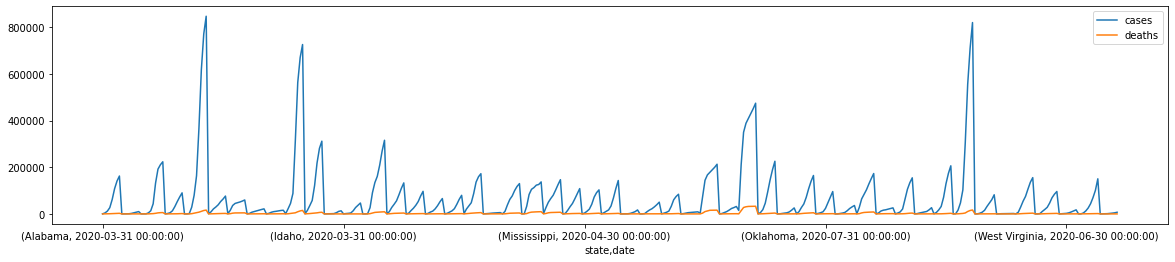

In [13]:
#see where the major spikes are in cases and deaths
bymonthly_state.plot(figsize=(20,4))

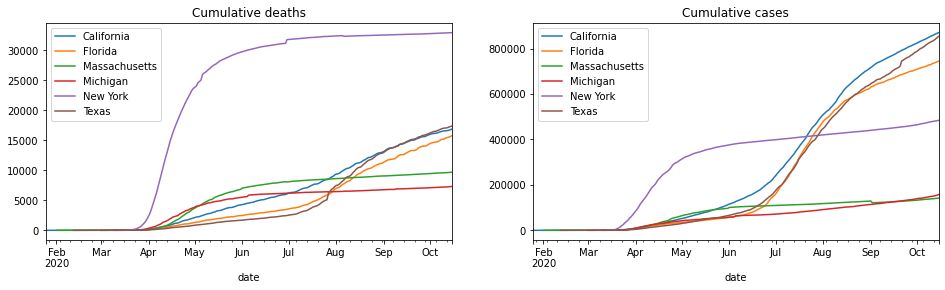

In [14]:
states_to_use = ['New York', 'California', 'Massachusetts', 'Texas', 'Florida','Michigan']
state_filter = covid_df['state'].isin(states_to_use)
fig,ax=plt.subplots(1,2, figsize=(16,4))
ts_plot=covid_df[state_filter].groupby('state')['deaths'].plot(ax=ax[0], 
                                                              legend=True,
                                                             title="Cumulative deaths")
ts2_plot=covid_df[state_filter].groupby('state')['cases'].plot(ax=ax[1], 
                                                                   legend=True,
                                                                  title="Cumulative cases")

# Save cleaned dataset as a new csv

In [15]:
covid_df.to_csv('../data/clean/covidstate_clean.csv', index=False)

Text(0, 0.5, 'death mean')

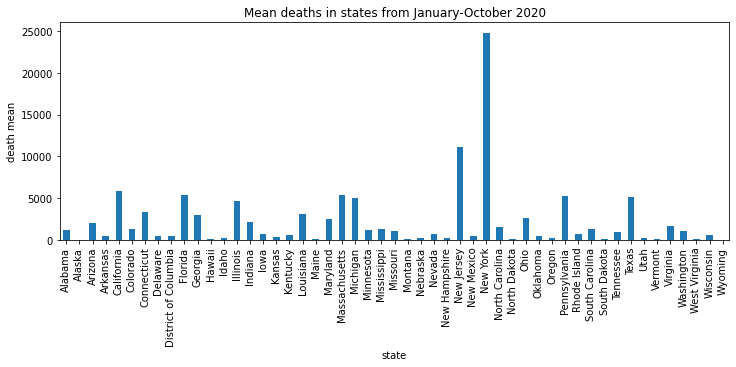

In [16]:
#deaths mean in states
statedeath_mean = covid_df.groupby('state')['deaths'].mean()
statedeath_mean.plot(kind='bar', 
                 legend=False,
                      figsize= (12,4))

plt.title('Mean deaths in states from January-October 2020')
plt.xlabel('state')
plt.ylabel('death mean')

Text(0, 0.5, 'cases mean')

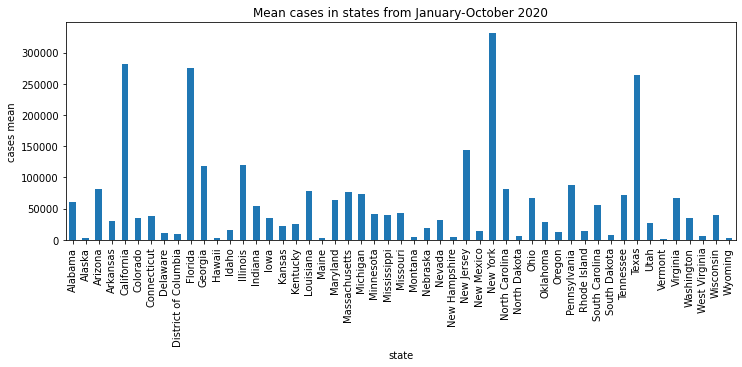

In [17]:
statecases_mean = covid_df.groupby('state')['cases'].mean()
statecases_mean.plot(kind='bar', 
                 legend=False,
                      figsize= (12,4))

plt.title('Mean cases in states from January-October 2020')
plt.xlabel('state')
plt.ylabel('cases mean')

# In this part of the notebook, we will look at the following ways of using data in a story:
    
    * 1. Internal comparison 
    
    * 2. Proportion
    

In [18]:
covid_df.shape

(11649, 4)

### 1. Internal Comparison

#### Q1. Did Texas or California have more cases and deaths?

* Steps:
    1. create filters on the `covid_df` data frame to find rows with:
        * `deaths` value
        * `cases` value 
    2. create a subset of the data frame called `california_data` and 'texas_data' with just these rows
    3. count the number of rows

In [19]:
# 1a. create filters for cases and deaths

case_count=covid_df['cases']>0
death_count=covid_df['deaths']>0


In [20]:
# 1b. filters for state
california_data = covid_df['state']=='California'
texas_data = covid_df['state']=='Texas'

In [21]:
# find the amount of california cases and texas cases
california_cases=covid_df[case_count & california_data].shape[0]

texas_cases=covid_df[case_count & texas_data].shape[0]

In [22]:
print(california_cases, texas_cases)

265 247


* This seems like too small of a number for cases in California and Texas, uncertain that these are correct values, will forgo in final presentation

In [23]:
#add deaths code here
california_deaths=covid_df[death_count & california_data].shape[0]

texas_deaths=covid_df[death_count & texas_data].shape[0]

In [24]:
print(california_deaths, texas_deaths)

226 214


* These calculations of this data do not seem to make sense-- uncertain to use this in final presentation 

### 2. Proportion

#### Q1. What was the proportion of deaths to cases?

* Steps:
    1. create filters on the `covid_df` data frame to find rows with:
        * `case_count` value of `True`
        * `death_count` value of 'True'
    2. create subset data frames
        a. one called `cases_us`
        b. another called `deaths_us` with just these rows
    3. count the number of rows in both subsets
    4. calculate the proportion as a percentage

In [25]:
# 1. create filters
case_count=covid_df['cases']>0
death_count=covid_df['deaths']>0


# 2. create subset data frames
cases_us = covid_df[case_count]
deaths_us = covid_df[case_count & death_count]

#3. count rows
num_cases_us =cases_us.shape[0]
num_deaths_us=deaths_us.shape[0]


# 4. calculate the proportion
deathvcases_percent = num_deaths_us / num_cases_us * 100


In [26]:
deathvcases_percent

92.15383294703408

* There is a 92.35% rate of deaths per cases
* Not certain that this calculation is correct, will forgo using this in my final presentation